En el presente codigo se realiza con el lenguaje de programación Python, el analisis de una base de datos extensa que contiene precios, ubicación, tamaño y mas información de viviendas en venta. 

Con las librerias correspondientes se realizan los estudios necesarios para conocer las medidas de tendencia central de variables(columnas), medidas de dispersión, histogramas, analisis bivariado, y mucho mas.



Importamos librerias

In [ ]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

La siguiente forma de subir nuestro dataset es para hacerlo de forma local, en este caso usaremos un dataset que contiene informacion de casas, departamentos y con sus respectivos años de contruccion, valor, forma y mas.

In [ ]:
from google.colab import files

uploaded = files.upload()

In [3]:
uploaded

Output hidden; open in https://colab.research.google.com to view.

Consultamos el tipo del dataset

In [4]:
type(uploaded)

dict

Levantamos el dataset como un dataframe, asi podemos visualizarlo de una forma estructurada

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['vivienda.csv']),sep=",")
df1 = pd.read_csv(io.BytesIO(uploaded['vivienda.csv']),sep=",")
df1.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


**Contenido del dataset**

El dataset mostrado contiene información sobre viviendas construidas desde 1799 hasta 2017.




Consultamos el tamaño de nuestro dataset, osea la cantidad de filas y de columunas

In [6]:
df1.shape
print('El df tiene {} instancias y {} features'.format(df1.shape[0],df1.shape[1]))

El df tiene 56477 instancias y 19 features


Acontinuación podemos ver el nombre de las columnas o features

In [7]:
df1.columns

Index(['UniqueID ', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

Consulto el tipo de datos de cada columna

In [8]:
df1.dtypes

UniqueID             int64
ParcelID            object
LandUse             object
PropertyAddress     object
SaleDate            object
SalePrice           object
LegalReference      object
SoldAsVacant        object
OwnerName           object
OwnerAddress        object
Acreage            float64
TaxDistrict         object
LandValue          float64
BuildingValue      float64
TotalValue         float64
YearBuilt          float64
Bedrooms           float64
FullBath           float64
HalfBath           float64
dtype: object

Realizamos una limpieza de datos, primero vemos el tipo de dato que es cada variable o columna.



In [9]:
# Info:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

Vemos la cantidad de datos NULOS

In [11]:
# Vemos la cantidad de datos nulos:
df1.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

Vemos la cantidad de datos que no aplican

In [12]:
#Vemos la cantidad de No Aplica
df1.isna().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

Rellenamos los datos Nulos con la mediana:

In [13]:
# Rellenamos con la Mediana, con una funcion anidada, le dice hace el calculo de la mediana y rellena
df1= df1.fillna(df1.median())
df1

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.30,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.50,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.90,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.60,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.00,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,0.27,NaN,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,0.27,NaN,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,0.27,NaN,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,0.27,NaN,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0


Consultamos nuevamente los datos Nulos y vemos que fueron rellenados, pero los datos que son de tipo objetos no se rellenan ya que no se puede calcular la mediana de esos datos.

In [14]:
# Vemos la cantidad de nulos:
df1.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage                0
TaxDistrict        30462
LandValue              0
BuildingValue          0
TotalValue             0
YearBuilt              0
Bedrooms               0
FullBath               0
HalfBath               0
dtype: int64

Visualizamos las categorias de LandUse que tenemos y podemos ver que la muchas viviendas del tipo SINGLE FAMILY

In [16]:
df1.LandUse.value_counts()

SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
SPLIT CLASS                                      17
VACANT COMMERCIAL LAND                           17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARSONAGE   

Obtenemos la cantidad de LandUse: tenemos 39 categorias de esta variable

In [17]:
len(df1.LandUse.value_counts())

39

Graficamos la frecuencia de LandUse y vemos que coincide con la informacion anterior. SINGLE FAMILY es la categoria con mayor presencia en la base de datos.

<Axes: title={'center': 'LandUse'}, ylabel='Frecuencia'>

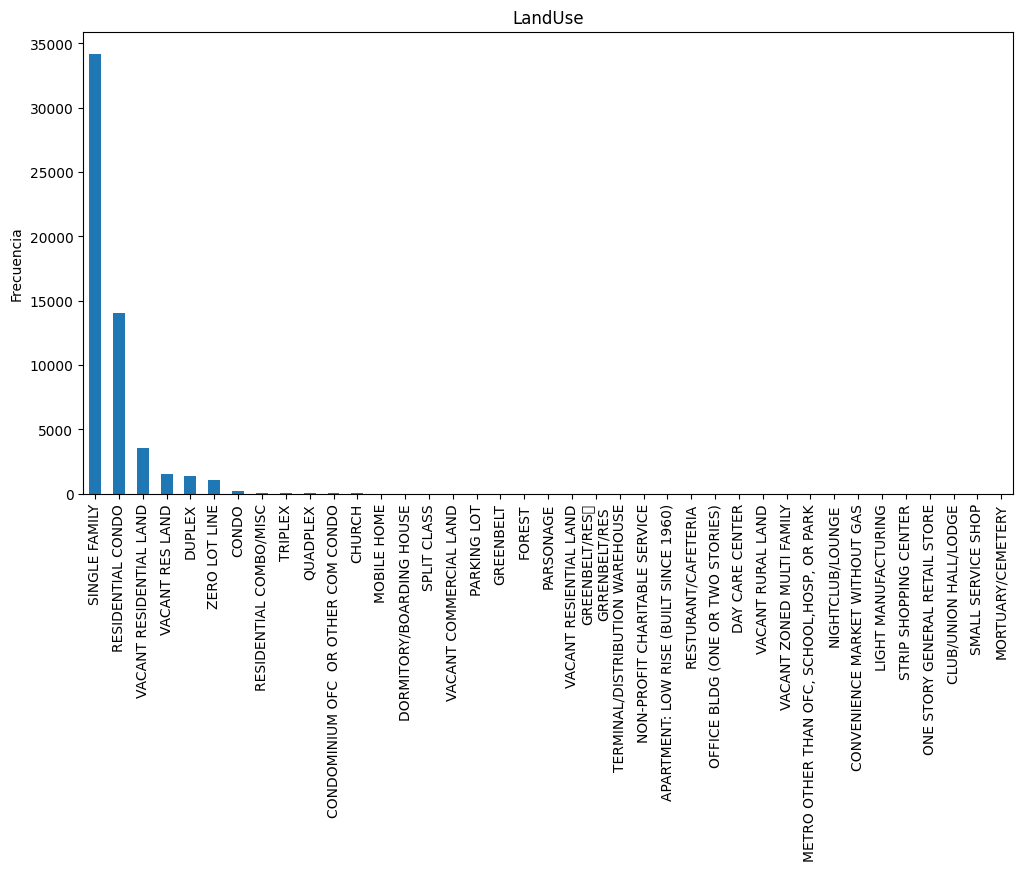

In [18]:
df1['LandUse'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='LandUse')

Vemos las categorias de TaxDistrict:

In [19]:
df1.TaxDistrict.value_counts()

URBAN SERVICES DISTRICT      20024
GENERAL SERVICES DISTRICT     4556
CITY OF FOREST HILLS           407
CITY OF OAK HILL               393
CITY OF GOODLETTSVILLE         379
CITY OF BELLE MEADE            235
CITY OF BERRY HILL              21
Name: TaxDistrict, dtype: int64

Graficamos la frecuencia de TaxDistrict:

<Axes: title={'center': 'TaxDistrict'}, ylabel='Frecuencia'>

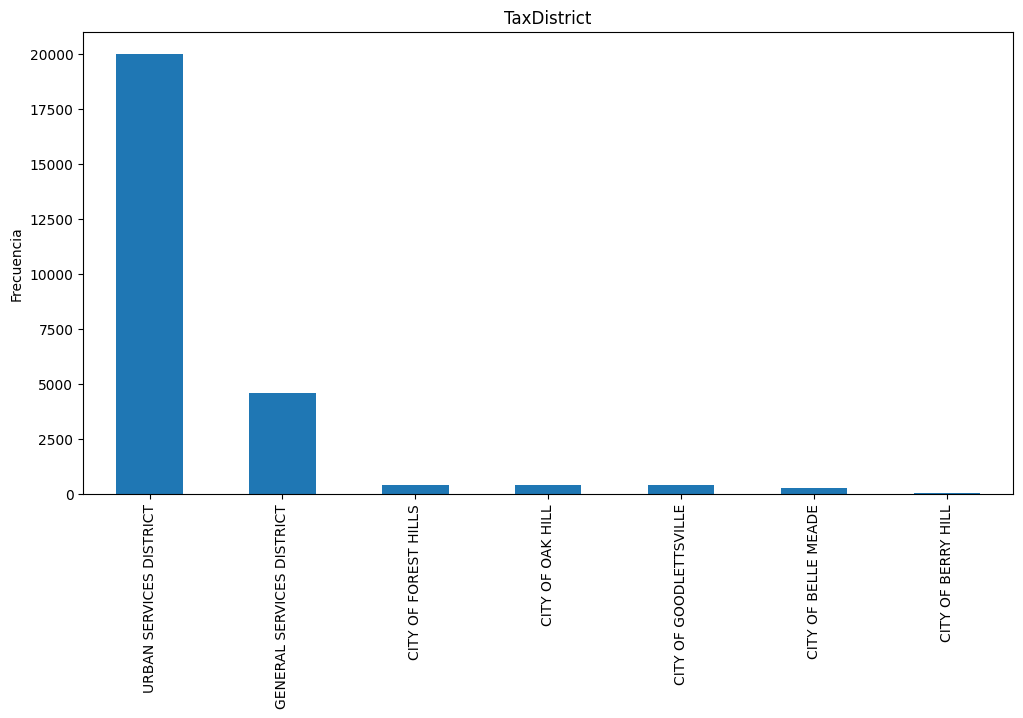

In [20]:
 df1['TaxDistrict'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='TaxDistrict')

Calculamos la media, la mediana y la moda de TotalValue:

In [21]:
df1['TotalValue'].mean()

187135.5242133966

In [22]:
df1['TotalValue'].median()

148500.0

In [23]:
df1['TotalValue'].mode()

0    148500.0
Name: TotalValue, dtype: float64

Implementamos la funcion describe() para poder ver mas informacion del dataset.

In [24]:
# DESCRIBE: Esta funcion me da mucha información de cada columna; cantida de datos,calcula promedio, desvio standar, valor mas chico, cuartil 1,2(mediana),3, y el valor max observado
df1.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,56477.000000,56477.000000,5.647700e+04,5.647700e+04,5.647700e+04,56477.00000,56477.000000,56477.000000,56477.000000
mean,28334.001133,0.375449,4.734891e+04,1.341481e+05,1.871355e+05,1961.60221,3.038458,1.951007,0.121377
std,16352.590651,1.071943,7.471502e+04,1.424953e+05,1.952834e+05,17.45997,0.559551,0.632890,0.348546
min,0.000000,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.00000,0.000000,0.000000,0.000000
25%,14186.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000,3.000000,2.000000,0.000000
50%,28313.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000,3.000000,2.000000,0.000000
75%,42513.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000,3.000000,2.000000,0.000000
max,56635.000000,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.00000,11.000000,10.000000,3.000000


Calculamos la moda de dos variables; de Bedrooms y FullBath:
Deducimos que las viviendas con 3 dormitorios es la de mayor presencia.
Y que la cantidad de 2 baños full es la de mayor presencia.


In [25]:
df1['Bedrooms'].mode()

0    3.0
Name: Bedrooms, dtype: float64

In [26]:
df1['FullBath'].mode()

0    2.0
Name: FullBath, dtype: float64

Aqui obtenemos todas las categorias de LandUse, con su valor de media en la columna correspondiente.

In [27]:
df1.groupby('LandUse').mean()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
LandUse,,,,,,,,,
APARTMENT: LOW RISE (BUILT SINCE 1960),30479.500000,1.170000,70500.000000,418900.000000,493300.000000,1958.000000,0.000000,0.000000,0.000000
CHURCH,27478.617647,2.110882,97026.470588,594270.588235,723373.529412,1967.382353,1.647059,0.705882,0.088235
CLUB/UNION HALL/LODGE,19864.000000,0.220000,18000.000000,31100.000000,56500.000000,1965.000000,0.000000,0.000000,0.000000
CONDO,10270.910931,0.270000,28800.000000,111400.000000,148500.000000,1960.000000,3.000000,2.000000,0.000000
CONDOMINIUM OFC OR OTHER COM CONDO,32227.485714,0.270000,28800.000000,111400.000000,148500.000000,1960.000000,3.000000,2.000000,0.000000
CONVENIENCE MARKET WITHOUT GAS,18443.000000,0.380000,26000.000000,9500.000000,35500.000000,1950.000000,0.000000,0.000000,0.000000
DAY CARE CENTER,41958.500000,1.625000,23550.000000,420550.000000,472750.000000,1950.500000,1.500000,1.500000,0.000000
DORMITORY/BOARDING HOUSE,27592.000000,0.355263,40221.052632,165431.578947,207252.631579,1944.473684,3.947368,2.263158,0.210526
DUPLEX,27066.221413,0.319337,55628.113620,108792.061180,166325.491624,1962.105608,3.761107,2.334304,0.093227


## **Medidas de dispersión**

Calculamos la covarianza entre TotalValue y las Acreage.

In [29]:
import numpy as np
np.cov([df1['TotalValue'], df1['Acreage']])

array([[3.81356070e+10, 4.74833792e+04],
       [4.74833792e+04, 1.14906103e+00]])

Calculamos la matriz de correlacion entre las dos variables:

In [30]:
np.corrcoef(df1['TotalValue'], df1['Acreage'])

array([[1.        , 0.22683222],
       [0.22683222, 1.        ]])

Calculamos el std de TotalValue:

In [31]:
std_totalvalue = df1['TotalValue'].std()
std_totalvalue

195283.40178835328

Calculamos el CV de TotalValue:

In [32]:
CV = (std_totalvalue/df1['TotalValue'].mean())*100
print('CV TotalValue:', round(CV,2),'%')

CV TotalValue: 104.35 %


Grafico de TotalValue vs Acreage

Primero creamos un dataframe con la informacion de solo la categoria DUPLEX de la variable LandUse.

In [34]:
duplex = (df1.LandUse =='DUPLEX')
df_duplex = df1[duplex]

Graficamos TotalValue vs Acreage: vemos que la mayor cantidad de la superficie en acres se encuentra entre 0.2 hasta 1, en un valor total de 0.2x10^6 hasta 0.6x10^6

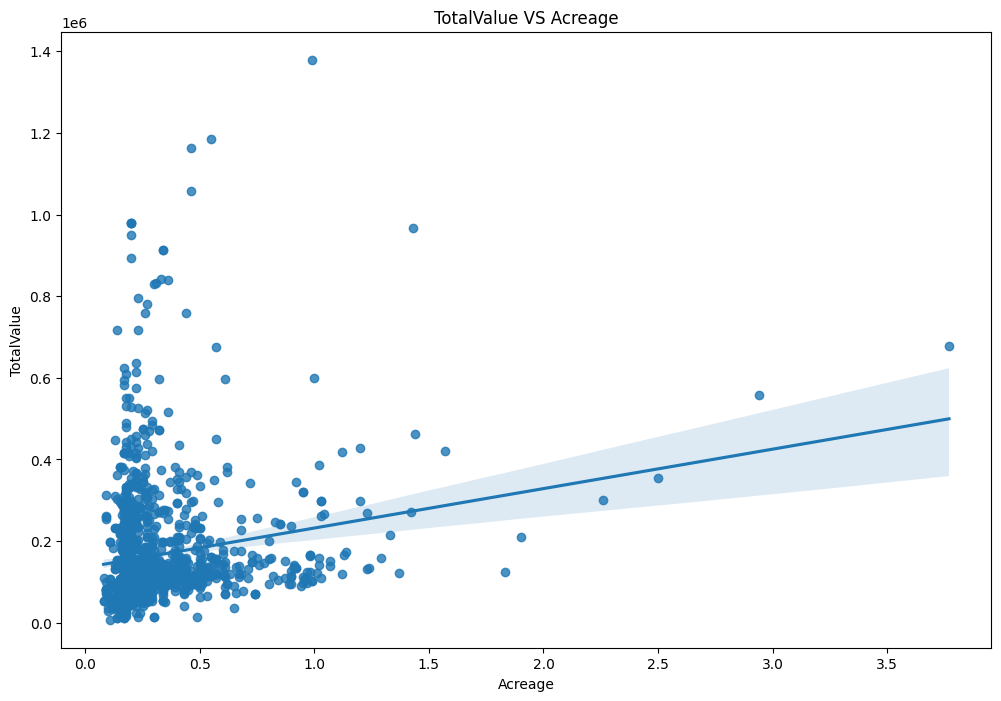

In [36]:
# Scatterplot:
import seaborn as sns
fig = plt.figure(figsize=(12, 8))
ax = sns.regplot(x="Acreage", y="TotalValue", data=df_duplex)
ax.set(xlabel='Acreage', ylabel='TotalValue')
plt.title('TotalValue VS Acreage')
plt.show()

**Barplot**: LandUse vs TotalValue

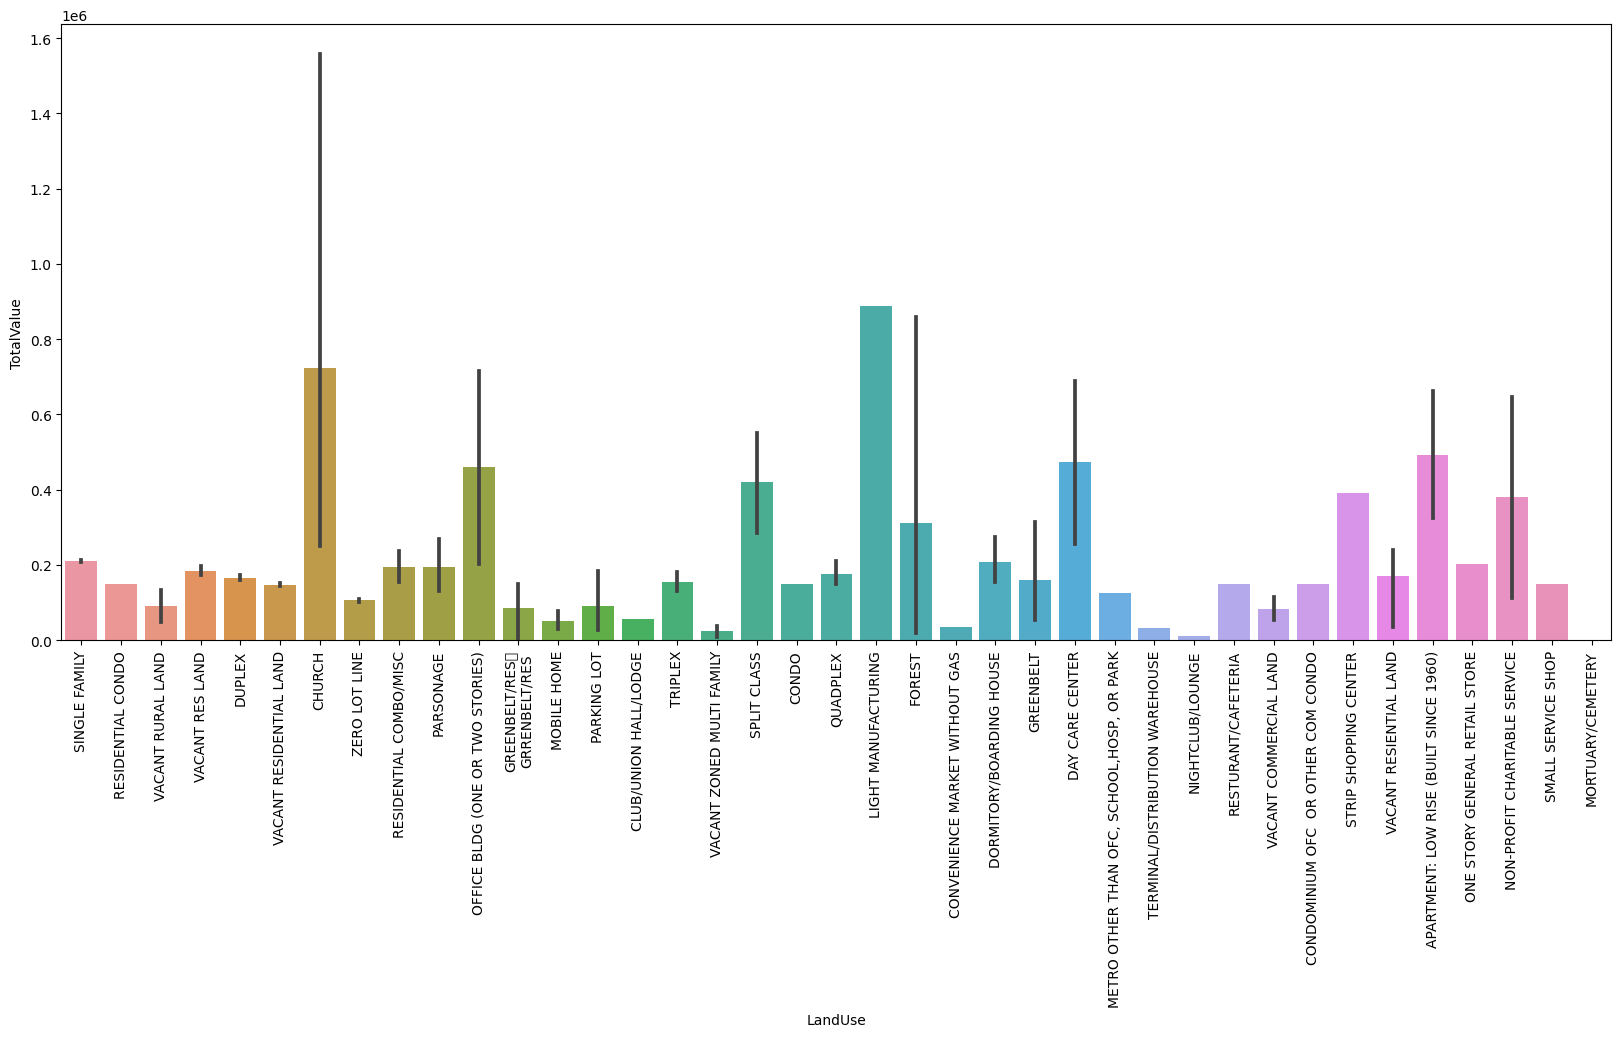

In [37]:
# Grafico
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20, 8))
sns.barplot(x="LandUse", y="TotalValue", data=df1)
plt.xticks(rotation=90)
plt.show()

Aqui creamos un dataframe que solo contenga la informacion del año 1998, por que seria el año que nos intereza analizar:

In [38]:
ano_1998 = (df1.YearBuilt ==1998)
df_1998 = df1[ano_1998]
df_1998

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.50,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
147,43075,025 04 0 115.00,SINGLE FAMILY,"310 MCCOIN DR, GOODLETTSVILLE","January 26, 2016",275000,20160127-0007808,No,"CANNON, JULIAN","310 MCCOIN DR, GOODLETTSVILLE, TN",0.38,CITY OF GOODLETTSVILLE,24000.0,198100.0,222100.0,1998.0,4.0,4.0,0.0
148,6995,025 04 0 126.00,SINGLE FAMILY,"104 ESSEX CT, GOODLETTSVILLE","August 6, 2013",203000,20130807-0082622,No,"JASPER, ALLISON & JAYME","104 ESSEX CT, GOODLETTSVILLE, TN",1.41,CITY OF GOODLETTSVILLE,45700.0,157500.0,203200.0,1998.0,3.0,2.0,0.0
149,53119,025 04 0 126.00,SINGLE FAMILY,"104 ESSEX CT, GOODLETTSVILLE","August 19, 2016",231500,20160830-0090683,No,"JASPER, ALLISON & JAYME","104 ESSEX CT, GOODLETTSVILLE, TN",1.41,CITY OF GOODLETTSVILLE,45700.0,157500.0,203200.0,1998.0,3.0,2.0,0.0
1141,22762,034 13 0 286.00,SINGLE FAMILY,"608 MONTICELLO CT, MADISON","October 8, 2014",170000,20141009-0093887,No,"POTTER, PETER C., JR.","608 MONTICELLO CT, MADISON, TN",0.26,GENERAL SERVICES DISTRICT,24500.0,101300.0,125800.0,1998.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51001,41396,171 04 0 031.00,SINGLE FAMILY,"5656 CLOVERMEADE DR, BRENTWOOD","December 17, 2015",397000,20151229-0130418,No,"DELOACH, DAVID & TINA","5656 CLOVERMEADE DR, BRENTWOOD, TN",0.98,URBAN SERVICES DISTRICT,66000.0,382900.0,448900.0,1998.0,4.0,2.0,1.0
54077,20398,176 05 0 009.00,SINGLE FAMILY,"4917 HICKORY WOODS E, ANTIOCH","August 7, 2014",134000,20140813-0073054,No,"APPLEBY, JESSIE A.","4917 HICKORY WOODS E, ANTIOCH, TN",0.24,URBAN SERVICES DISTRICT,25000.0,90600.0,115600.0,1998.0,3.0,2.0,0.0
54082,43543,176 05 0 025.00,SINGLE FAMILY,"4912 HICKORY WOODS E, ANTIOCH","January 29, 2016",199000,20160202-0009881,No,"BERNALES, MARVIN LEONEL GUERRA & MIJANGOS, GUA...","4912 HICKORY WOODS E, ANTIOCH, TN",0.35,URBAN SERVICES DISTRICT,25000.0,135400.0,160400.0,1998.0,3.0,3.0,0.0
54087,23224,176 05 0 046.00,SINGLE FAMILY,"4489 LAVERGNE COUCHVILLE PIKE, ANTIOCH","October 6, 2014",147000,20141008-0093364,No,"AMERICAN RESIDENTIAL LEASING COMPANY, LLC","4489 LAVERGNE COUCHVILLE PIKE, ANTIOCH, TN",0.25,URBAN SERVICES DISTRICT,25000.0,113500.0,138500.0,1998.0,3.0,2.0,0.0


In [39]:
# Resumen estadístico del df_1998:
df_1998.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,87.000000,87.000000,8.700000e+01,8.700000e+01,8.700000e+01,87.0,87.000000,87.000000,87.000000
mean,30090.344828,0.587241,8.107126e+04,2.111874e+05,2.943460e+05,1998.0,3.287356,2.643678,0.057471
std,16704.726284,1.021295,1.509061e+05,3.076680e+05,4.577787e+05,0.0,0.729894,0.976194,0.279381
min,1444.000000,0.100000,6.000000e+03,5.140000e+04,7.240000e+04,1998.0,2.000000,1.000000,0.000000
25%,17156.500000,0.205000,2.500000e+04,8.535000e+04,1.052000e+05,1998.0,3.000000,2.000000,0.000000
50%,29507.000000,0.260000,2.750000e+04,1.193000e+05,1.468000e+05,1998.0,3.000000,2.000000,0.000000
75%,44515.500000,0.385000,4.535000e+04,1.750000e+05,2.180500e+05,1998.0,3.500000,3.000000,0.000000
max,56413.000000,7.050000,1.004400e+06,2.239600e+06,3.290300e+06,1998.0,7.000000,7.000000,2.000000


Graficamos la distribución de la variable TotalValue de df_1998: esto es para tener una buena visualizacion del grafico

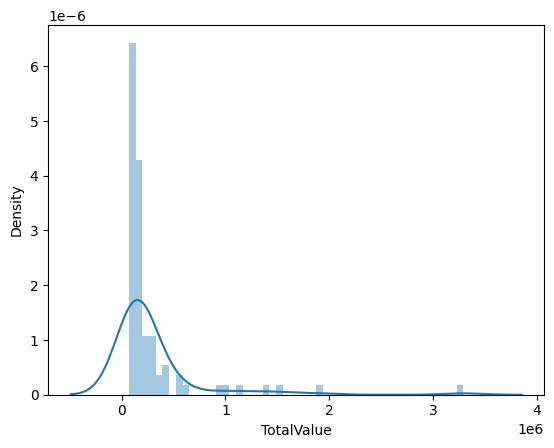

In [40]:
sns.distplot(df_1998['TotalValue'], kde=True) #False: para que no se traze la linea continua
plt.show()

#HISTOGRAMA

Graficamos el histograma de la variable TotalValue:

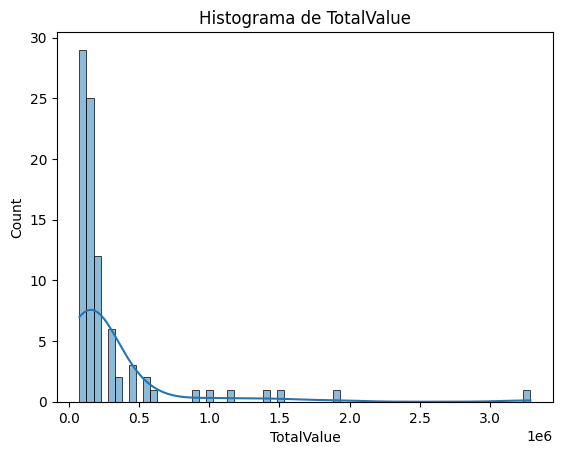

In [41]:
sns.histplot(data=df_1998,x='TotalValue', kde=True)
plt.title('Histograma de TotalValue')
plt.show()

Segmentamos la variable TotalValue de df_1998 con LandUse y graficamos: y vemos que en 1998 solo hay dos categorias de LandUse, estas son SINGLE FAMILY y ZERO LOT LINE

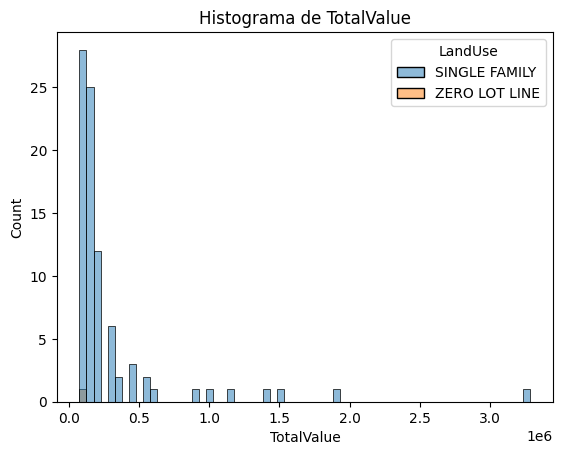

In [42]:
sns.histplot(data=df_1998,x='TotalValue',hue='LandUse')
plt.title('Histograma de TotalValue')
plt.show()

Seguimos segmentando TotalValue pero ahora con LandUse y TaxDistrict del dataframe de duplex df_duplex

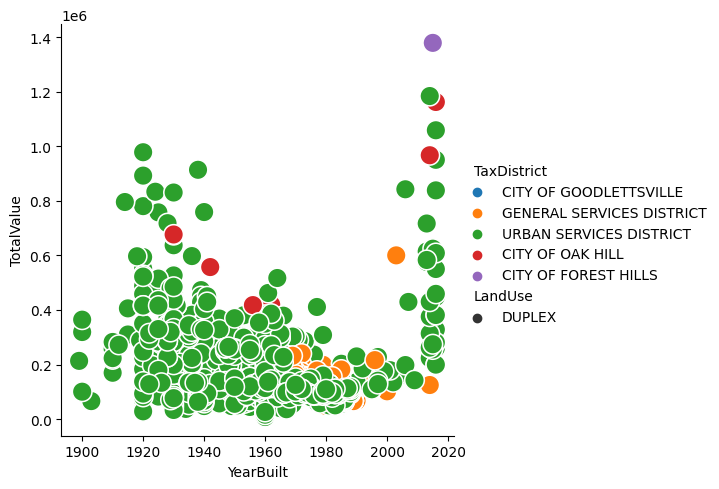

In [43]:
# parámetro style:
sns.relplot(x="YearBuilt",y="TotalValue",data=df_duplex,kind="scatter",hue="TaxDistrict",style="LandUse",s=200)

Grafico de barras de df_duplex y vemos que la categoria URBAN SERVICES DISTRICT es la de mayor presencia en los DUPLEX :

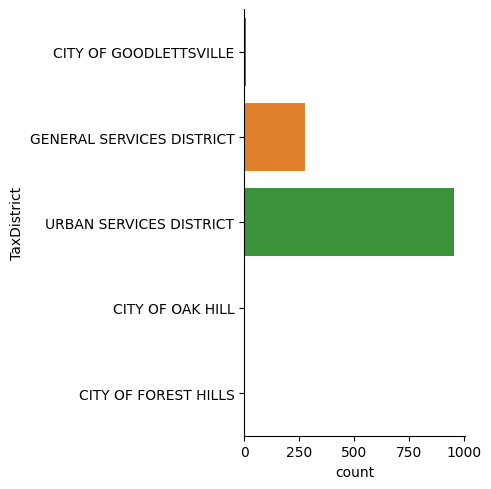

In [44]:
sns.catplot(y ="TaxDistrict", data = df_duplex, kind ="count");

Boxplot con el dataframe df_duplex pero segmentamos con TaxDistrict y LandUse, en este caso LandUse sera de solo duplex

_Podemos deducir que CITY OF OAK HILL tiene muchos valores atipicos y nos conviene usar la mediana como valor representativo.
_En cambio con CITY OF OAK HILL no presenta valores atipicos por ende nos conviene usar como valor representatito la media.

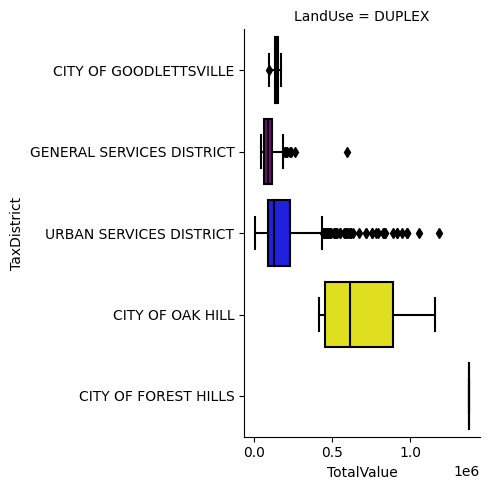

In [46]:
sns.catplot(x ="TotalValue",y ="TaxDistrict", data = df_duplex, kind ="box",palette={"URBAN SERVICES DISTRICT":"blue","GENERAL SERVICES DISTRICT":"purple",
                                                                                     "CITY OF GOODLETTSVILLE":"red","CITY OF OAK HILL":"yellow","CITY OF FOREST HILLS":"black"},col="LandUse");

Joinplot

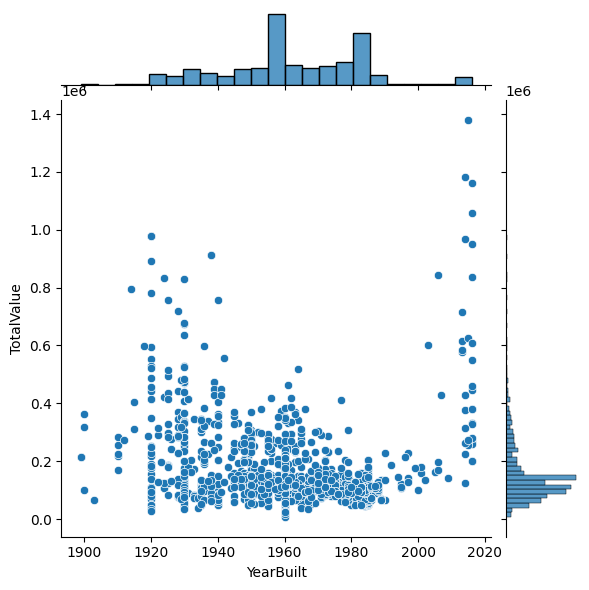

In [47]:
sns.jointplot(x ="YearBuilt", y ="TotalValue", data =df_duplex)

# PLOTLY

In [48]:
import plotly.express as px

Creamos un nuevo df seleccionando las categorias DUPLEX,TRIPLEX,QUADPLEX de LandUse

In [49]:
plex = df1 ['LandUse'].isin(['DUPLEX','TRIPLEX','QUADPLEX'])
df_plex = df1[plex]
df_plex

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
64,14425,018 03 0 026.00,DUPLEX,"408 ISAAC DR, GOODLETTSVILLE","April 4, 2014",170000,20140424-0034560,No,"HILL, RAYMOND & KILPATRICK, MARK W. & DAWN H.","408 ISAAC DR, GOODLETTSVILLE, TN",1.14,CITY OF GOODLETTSVILLE,30800.0,130100.0,173600.0,1974.0,3.0,3.0,1.0
127,51970,018 16 0 205.00,DUPLEX,"225 GRAVES RD, GOODLETTSVILLE","July 15, 2016",143000,20160719-0074416,No,CASCADE INVESTMENTS INC.,"225 GRAVES RD, GOODLETTSVILLE, TN",0.34,CITY OF GOODLETTSVILLE,15000.0,85900.0,100900.0,1985.0,4.0,2.0,0.0
145,48721,025 04 0 060.00,DUPLEX,"244 MCCOIN DR, GOODLETTSVILLE","May 27, 2016",125000,20160531-0054506,No,"BARNES, SAVANNAH ELIZABETH & BRASELLS, NATHANA...","244 MCCOIN DR, GOODLETTSVILLE, TN",0.97,CITY OF GOODLETTSVILLE,30600.0,67600.0,98200.0,1954.0,4.0,2.0,0.0
175,13356,025 12 0 042.00,DUPLEX,"702 CERRO VISTA DR, GOODLETTSVILLE","March 7, 2014",155000,20140311-0020141,No,"POLING, JASON","702 CERRO VISTA DR, GOODLETTSVILLE, TN",0.87,CITY OF GOODLETTSVILLE,30800.0,120400.0,151200.0,1958.0,4.0,2.0,1.0
187,25017,025 14 0 002.00,DUPLEX,"215 DRY CREEK RD, GOODLETTSVILLE","December 5, 2014","120,000",20141208-0112026,No,"SMITH, DAVID A. & JULIANNE","215 DRY CREEK RD, GOODLETTSVILLE, TN",0.91,CITY OF GOODLETTSVILLE,35000.0,98300.0,133300.0,1973.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,34005,162 09 0 018.00,DUPLEX,"605 CEDAR CT, NASHVILLE","July 14, 2015",95000,20150715-0068847,No,"MORALES, FRANCISCO","605 CEDAR CT, NASHVILLE, TN",0.20,URBAN SERVICES DISTRICT,25000.0,65800.0,90800.0,1980.0,4.0,2.0,0.0
48806,55439,162 09 0 018.00,DUPLEX,"605 CEDAR CT, NASHVILLE","October 28, 2016",135000,20161031-0114788,No,"MORALES, FRANCISCO","605 CEDAR CT, NASHVILLE, TN",0.20,URBAN SERVICES DISTRICT,25000.0,65800.0,90800.0,1980.0,4.0,2.0,0.0
48915,25774,162 10 0 169.00,DUPLEX,"504 LOU CT, ANTIOCH","January 26, 2015",115500,20150130-0008878,No,"VERGARA, PABEL NAVARRO & RAMOS-PEREIRA, NEYDI ...","504 LOU CT, ANTIOCH, TN",0.36,URBAN SERVICES DISTRICT,24000.0,69600.0,93600.0,1979.0,4.0,4.0,0.0
48985,32191,162 13 0 028.00,DUPLEX,"425 CEDARVALLEY DR, NASHVILLE","June 15, 2015",95900,20150617-0057556,No,"TN RENTALHOUSES, LLC","425 CEDARVALLEY DR, NASHVILLE, TN",0.34,URBAN SERVICES DISTRICT,25000.0,72200.0,97200.0,1982.0,4.0,2.0,0.0


Segmentamos por TaxDritrict y con este grafico de boxplot podemos leer directamente los valores minimos maximos, mediana, cuartiles y mas

In [51]:
fig = px.box(df_plex, x="TaxDistrict", y="TotalValue", color="LandUse")
fig.show()

In [52]:
# Dispersión
fig = px.box(df_plex, x="TaxDistrict", y="TotalValue", points="all")
fig.show()

In [53]:
#OLS
figure = px.scatter(data_frame = df_plex, x="YearBuilt",
                    y="TotalValue", color= "LandUse", trendline="ols")
figure.show()

Con el grafico de tortas podemos ver que el dataframe el df_plex contiene mayor cantidad de Duplex.

In [54]:
# pie plot
figure = px.pie(df_plex,
             values='TotalValue',
             names='LandUse',hole = 0.5,
             title = "Porcentaje de TotalValue según LandUse")
figure.show()

## MEDIDAS DE TENDENCIA CENTRAL

Trabajamos con el dataframe inicial

Visualizamos los valores importante de la variable TotalValue como el minimo, maximo, media, varianza y mas.

In [55]:
import scipy
scipy.stats.describe(df1['TotalValue'])

DescribeResult(nobs=56477, minmax=(100.0, 13940400.0), mean=187135.5242133966, variance=38135607014.03142, skewness=12.977004400937666, kurtosis=532.3520859538962)

In [56]:
scipy.stats.gmean(df1['TotalValue']) # Media geométrica

152151.42906236555

In [57]:
scipy.stats.hmean(df1['TotalValue']) # Media armónica

90358.02695399919

In [58]:
scipy.stats.trim_mean(df1['TotalValue'],0.1) # Media recortada (Proporción removida en cada cola 10%)

153576.98953146095

In [59]:
scipy.stats.mode(df1['TotalValue']) # moda Age

ModeResult(mode=array([148500.]), count=array([30474]))

## MEDIDAS DE DISPERSIÓN

In [60]:
scipy.stats.variation(df1['TotalValue']) # Calcular el coeficiente de variacion

1.0435307445021877

In [61]:
scipy.stats.iqr(df1['TotalValue']) # Calcular el IQR

0.0

In [62]:
scipy.stats.sem(df1['TotalValue']) # Calcular el Error estandar

821.7307179621547

## MEDIDAS DE ASIMETRIA Y KURTOSIS

In [63]:
scipy.stats.skew(df1['TotalValue']) # Calcular el CA  Asimetría (Skewness)

12.977004400937666

In [64]:
scipy.stats.kurtosis(df1['TotalValue']) # Calcular el CA_p  Kurtosis (Sesgo)

532.3520859538962

## Creamos matrices con las columnas de YearBuilt y TotalValue

Extraemos las columnas y las ponemos en un nuevo dataframe

In [65]:
df_construccion = df1['BuildingValue']
df_totalvalue = df1['TotalValue']

In [66]:
df_construccion

0        168200.0
1        264100.0
2        216200.0
3        147300.0
4        152300.0
           ...   
56472    111400.0
56473    111400.0
56474    111400.0
56475    111400.0
56476    111400.0
Name: BuildingValue, Length: 56477, dtype: float64

In [67]:
df_totalvalue

0        235700.0
1        319000.0
2        298000.0
3        197300.0
4        202300.0
           ...   
56472    148500.0
56473    148500.0
56474    148500.0
56475    148500.0
56476    148500.0
Name: TotalValue, Length: 56477, dtype: float64

Transformamos los dataframe en matrices

In [68]:
x= np.array(df_construccion)

In [69]:
x

array([168200., 264100., 216200., ..., 111400., 111400., 111400.])

In [70]:
y= np.array(df_totalvalue)

In [71]:
y

array([235700., 319000., 298000., ..., 148500., 148500., 148500.])

In [72]:
X = x.reshape((-1,1)) #pasamos los valores en forma de vector

In [73]:
X

array([[168200.],
       [264100.],
       [216200.],
       ...,
       [111400.],
       [111400.],
       [111400.]])

Acontinuacion graficamos las dos variables y vemos si tienen algun tipo de relacion:

Se podria decir que tienen un relacion positiva.

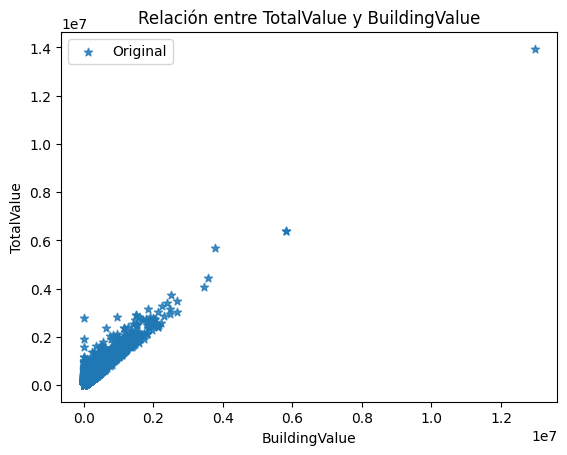

In [74]:
# Graficamos la relación
sns.regplot(x= X, y= y, fit_reg=False, label='Original',marker='*') #fit_reg = True
plt.xlabel('BuildingValue')
plt.ylabel('TotalValue')
plt.title('Relación entre TotalValue y BuildingValue')
plt.legend()
plt.show()

## **Método OLS**

In [75]:
# Vector con unos: nos sirve para calcular el valor de la ordenada al origen
ones = np.ones(shape=(len(X),1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [76]:
# Agregamos el vector x
X = np.append(ones, X, axis= 1)
X

array([[1.000e+00, 1.682e+05],
       [1.000e+00, 2.641e+05],
       [1.000e+00, 2.162e+05],
       ...,
       [1.000e+00, 1.114e+05],
       [1.000e+00, 1.114e+05],
       [1.000e+00, 1.114e+05]])

In [77]:
# Tamaño X
X.shape

(56477, 2)

In [78]:
# El vector x traspuesto
X.T

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.682e+05, 2.641e+05, 2.162e+05, ..., 1.114e+05, 1.114e+05,
        1.114e+05]])

In [79]:
# Utilizamos el metodo linalg para multiplicar los vectores:
X1 = np.linalg.inv(X.T @ X) # Calcular el inverso (multiplicativo) de una matriz, calculamos la inversa del producto matricial

In [80]:
X1

array([[ 3.33992382e-05, -1.16982049e-10],
       [-1.16982049e-10,  8.72036806e-16]])

In [81]:
# Estimaciones de betha:
betha = X1 @ (X.T @ y)

In [82]:
# b0 y b1 , el primer valor seria la ordenada al origen y la pendiente
betha.round(2) #round:redondea a dos decimales

array([1.307723e+04, 1.300000e+00])

In [83]:
# Creamos nuestras predicciones
preds = X @ betha    #aqui obtengo los puntos que estan encima de la recta
preds

array([231318.21209876, 355749.307292  , 293598.63513604, ...,
       157619.71150464, 157619.71150464, 157619.71150464])

Graficamos la recta y vemos que efectivamente hay una relacion lineal positiva  entre las dos variables.

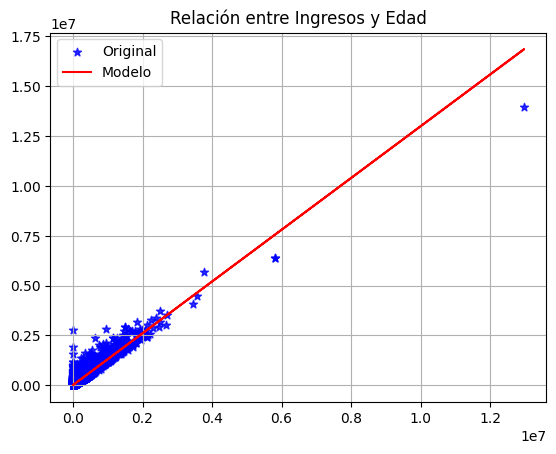

In [84]:
sns.regplot(x= x, y= y, fit_reg=False, marker='*' , color='blue', label= 'Original')
plt.plot(x, preds, label= 'Modelo', color='red')
plt.grid()
plt.legend()
plt.title('Relación entre Ingresos y Edad')
plt.show()

In [85]:
# Creamos la SSR, SSD, SST
y_mean = np.mean(y)
SSR = (preds - y_mean)**2            #suma cuadrado regresion, se quiere que sea grande
SSD = (y - preds)**2                 #suma cuadrado de los errores, se quiere que sea pequeño
SST = (y - y_mean)**2                #suma cuadrado total

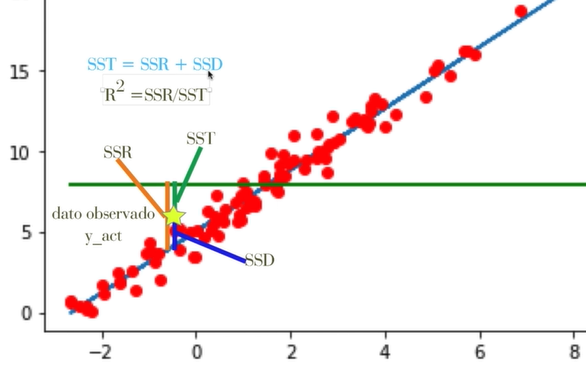

In [86]:
SSR_sum = sum(SSR) #sumatoria de esos valores
SSD_sum = sum(SSD)
SST_sum = sum(SST)

In [87]:
R2 = SSR_sum / SST_sum #suma cuadrado regresion divido suma cuadrado total
R2.round(3) #cerca de uno, es bastante buena mi regresion

0.896

Calculamos el coeficiente de correlacion y efectivamente vemos que da un valor cercano a 1. Eso quiere decir que hay una relacion fuerte.

In [88]:
R = np.sqrt(R2) # Vemos el coeficiente de correlación
R.round(3)

0.947

# **Regresión Lineal - Scikit Learn** Otro metodo de calculo

In [89]:
# Importamos el modelo Linear Regression: de esta forma sea hace en la vida real
from sklearn.linear_model import LinearRegression

In [90]:
# Instanciamos el modelo
model = LinearRegression()

In [91]:
# fiteamos el modelo:
model.fit(X,y)

LinearRegression()

In [92]:
# Solicitamos la predicción:
model.predict(X)

array([231318.21209876, 355749.307292  , 293598.63513604, ...,
       157619.71150464, 157619.71150464, 157619.71150464])

In [93]:
# Estimación de B1
print("b1: {:.3f}".format(model.coef_[1]))

b1: 1.298


In [94]:
# Estimación de B0
print("b0:  {:.3f}".format(model.intercept_))

b0:  13077.230


In [95]:
from sklearn.metrics import r2_score

In [96]:
# Calculamos r2
print("R Squares:{:.3f}".format(r2_score(y,preds)))

R Squares:0.896


**El R2 determina la calidad del
modelo para replicar los
resultados, indicando la
proporción de variación de los
resultados que puede
explicarse mediante el
modelo.**

In [97]:
error = y - preds

<Axes: ylabel='Density'>

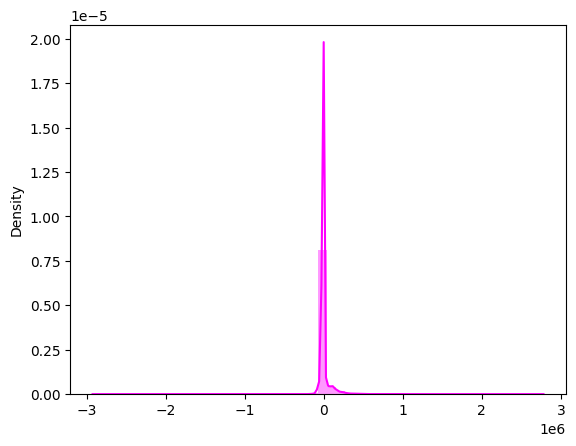

In [98]:
# Ploteamos la distribución de los errores para ver su comportamiento:
sns.distplot(error, color='Magenta')

#DISTRIBUCION NORMAL

In [99]:
from scipy import stats

Caculamos la media

In [100]:
mu = df1['TotalValue'].mean()
mu

187135.5242133966

Calculamos la desviación standar

In [101]:
sigma = df1['TotalValue'].std()
sigma

195283.40178835328

In [102]:
valores= df1['TotalValue']
m_valores= np.array(valores)
m_valores

array([235700., 319000., 298000., ..., 148500., 148500., 148500.])

Calculamos los valores Z

In [103]:
z = (m_valores - mu)/sigma
z

array([ 0.24868717,  0.67524672,  0.5677107 , ..., -0.19784336,
       -0.19784336, -0.19784336])

In [104]:
df_z = pd.DataFrame(z)
df_z

,0
0,0.248687
1,0.675247
2,0.567711
3,0.052050
4,0.077654
...,...
56472,-0.197843
56473,-0.197843
56474,-0.197843
56475,-0.197843


Acontinuación obtenemos la grafica de distribución normal de la variable TotalValue

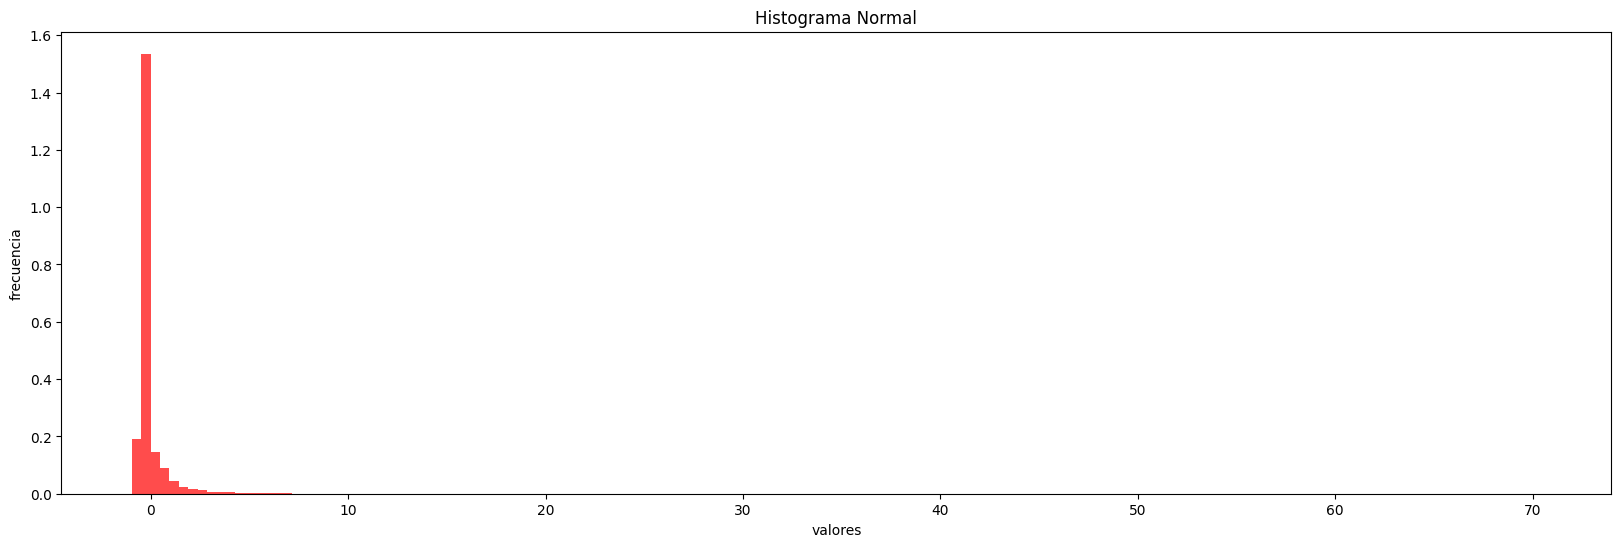

In [105]:
#datos = np.random.normal(mu,sigma,10000)    #histograma de datos simulados
plt.figure(figsize=(20,6))
plt.hist(z,150, color="r", density = True, alpha=0.7)  #le doy la continuidad con la cantidad de intervalos
plt.xlabel('valores')
plt.ylabel('frecuencia')
plt.title('Histograma Normal')
plt.show()

# Prueba de independencia

Realizamos la prueba de independencia entre dos variables

In [106]:
df_TaxDistrict = df_duplex['TaxDistrict']
df_FullBath = df_duplex['FullBath']

In [107]:
df_nuevo = pd.concat([df_TaxDistrict , df_FullBath], axis=1)
df_nuevo

,TaxDistrict,FullBath
64,CITY OF GOODLETTSVILLE,3.0
127,CITY OF GOODLETTSVILLE,2.0
145,CITY OF GOODLETTSVILLE,2.0
175,CITY OF GOODLETTSVILLE,2.0
187,CITY OF GOODLETTSVILLE,2.0
...,...,...
48805,URBAN SERVICES DISTRICT,2.0
48806,URBAN SERVICES DISTRICT,2.0
48915,URBAN SERVICES DISTRICT,4.0
48985,URBAN SERVICES DISTRICT,2.0


In [108]:
contigency= pd.crosstab(df_nuevo['TaxDistrict'], df_nuevo['FullBath'])
contigency

FullBath,1.0,2.0,3.0,4.0,5.0,6.0
TaxDistrict,,,,,,
CITY OF FOREST HILLS,0,0,0,1,0,0
CITY OF GOODLETTSVILLE,0,4,5,1,0,0
CITY OF OAK HILL,0,3,1,2,0,0
GENERAL SERVICES DISTRICT,0,216,11,49,1,1
URBAN SERVICES DISTRICT,4,739,110,96,5,4


In [109]:
# Porcentajes por filas:
contigency_pct = pd.crosstab(df_nuevo['TaxDistrict'], df_nuevo['FullBath'], normalize='index')
contigency_pct

FullBath,1.0,2.0,3.0,4.0,5.0,6.0
TaxDistrict,,,,,,
CITY OF FOREST HILLS,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
CITY OF GOODLETTSVILLE,0.000000,0.400000,0.500000,0.100000,0.000000,0.000000
CITY OF OAK HILL,0.000000,0.500000,0.166667,0.333333,0.000000,0.000000
GENERAL SERVICES DISTRICT,0.000000,0.776978,0.039568,0.176259,0.003597,0.003597
URBAN SERVICES DISTRICT,0.004175,0.771399,0.114823,0.100209,0.005219,0.004175


Podemos ver que URBAN SERVICES DISTRICT tiene una fuerte dependencia con FullBath

<Axes: xlabel='FullBath', ylabel='TaxDistrict'>

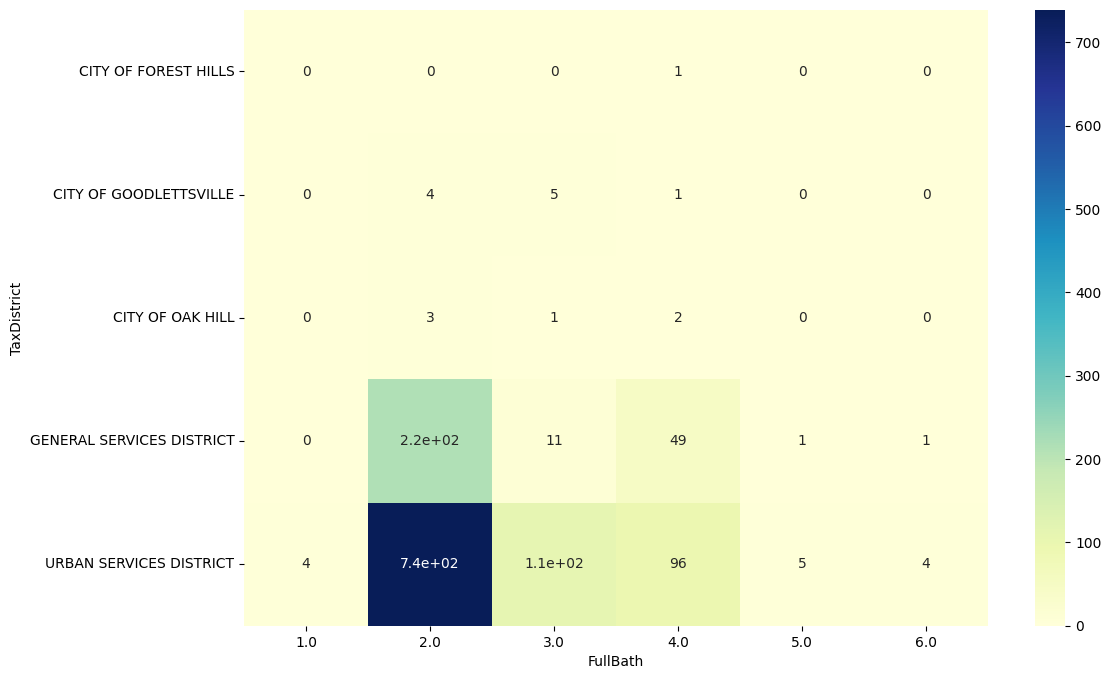

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

Vemos las categorias de SoldAsVacant

In [111]:
df1['SoldAsVacant'].value_counts()

No     51403
Yes     4623
N        399
Y         52
Name: SoldAsVacant, dtype: int64

Convertimos las features categóricas en numéricas:

In [112]:
# Convertimos las features categóricas en numéricas:
data1=pd.get_dummies(df1,columns=['FullBath', 'HalfBath'])
data1

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,FullBath_5.0,FullBath_6.0,FullBath_7.0,FullBath_8.0,FullBath_9.0,FullBath_10.0,HalfBath_0.0,HalfBath_1.0,HalfBath_2.0,HalfBath_3.0
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,0,0,0,0,0,0,1,0,0,0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,0,0,0,0,0,0,0,0,1,0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,0,0,0,0,0,0,1,0,0,0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,0,0,0,0,0,0,1,0,0,0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
# Creamos la instancia OneHotEncoder:1 representa la variable de interes y 0 para cualquier otro valor
enc = OneHotEncoder()

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          56477 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        56477 non-null  float64
 13  BuildingValue    56477 non-null  float64
 14  TotalValue       56477 non-null  float64
 15  YearBuilt        56477 non-null  float64
 16  Bedrooms         56477 non-null  float64
 17  FullBath    

Aplicamos el OneHotEncoder

In [118]:
data2=pd.DataFrame(enc.fit_transform(df1[['FullBath', 'HalfBath']]).toarray())
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56473,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [119]:
# Join con los df:
data3 = df1.join(data2)
data3

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,5,6,7,8,9,10,11,12,13,14
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Estandarización de 3 variables: Bedrooms, HalfBath, FullBath

In [120]:
# Importamos el dataset IRIS
from sklearn.datasets import load_iris

In [121]:
df_dormitorios= df1['Bedrooms']
df_baños= df1['HalfBath']
df_fullbaños= df1['FullBath']

Creamos el dataframe con las 3 variables

In [122]:
df_varios = pd.concat([df_dormitorios, df_baños, df_fullbaños], axis=1)
df_varios

,Bedrooms,HalfBath,FullBath
0,3.0,0.0,3.0
1,3.0,2.0,3.0
2,4.0,0.0,3.0
3,3.0,0.0,3.0
4,4.0,0.0,3.0
...,...,...,...
56472,3.0,0.0,2.0
56473,3.0,0.0,2.0
56474,3.0,0.0,2.0
56475,3.0,0.0,2.0


In [123]:
# Rellenamos con la Mediana, con una funcion anidada, le dice hace el calculo de la mediana y rellena
df_varios = df_varios.fillna(df_varios.median())
df_varios

,Bedrooms,HalfBath,FullBath
0,3.0,0.0,3.0
1,3.0,2.0,3.0
2,4.0,0.0,3.0
3,3.0,0.0,3.0
4,4.0,0.0,3.0
...,...,...,...
56472,3.0,0.0,2.0
56473,3.0,0.0,2.0
56474,3.0,0.0,2.0
56475,3.0,0.0,2.0


 Convertir a z score para estandarizar.

In [124]:
# Convertir a z score:
datos_z=pd.DataFrame()
for j in df_varios.columns[0:]:
  datos_z[j] = (df_varios[j] - df_varios[j].mean()) / df_varios[j].std()

datos_z

,Bedrooms,HalfBath,FullBath
0,-0.068730,-0.348237,1.657466
1,-0.068730,5.389881,1.657466
2,1.718418,-0.348237,1.657466
3,-0.068730,-0.348237,1.657466
4,1.718418,-0.348237,1.657466
...,...,...,...
56472,-0.068730,-0.348237,0.077412
56473,-0.068730,-0.348237,0.077412
56474,-0.068730,-0.348237,0.077412
56475,-0.068730,-0.348237,0.077412


Histograma de los z score, el promedio estaria en el cero y las demas son desvios standard

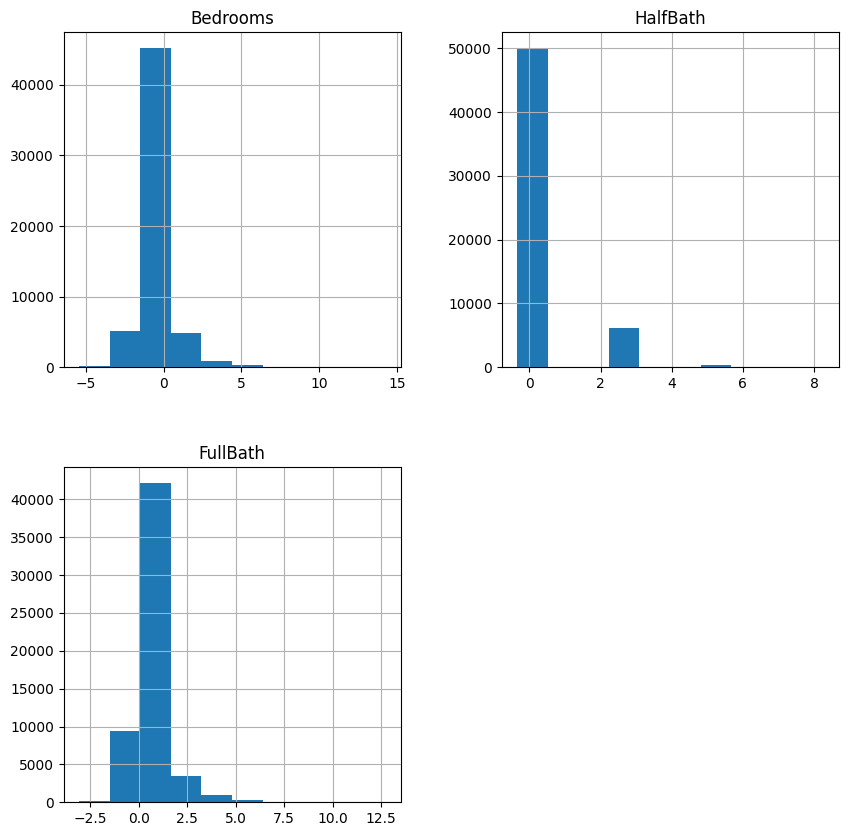

In [126]:
datos_z.hist(figsize =(10, 10));

Visualizaremos los VALORES ATÍPICOS - OUTLIERS

Deducimos que Bedrooms y FullBath tiene muchos valores atipicos.

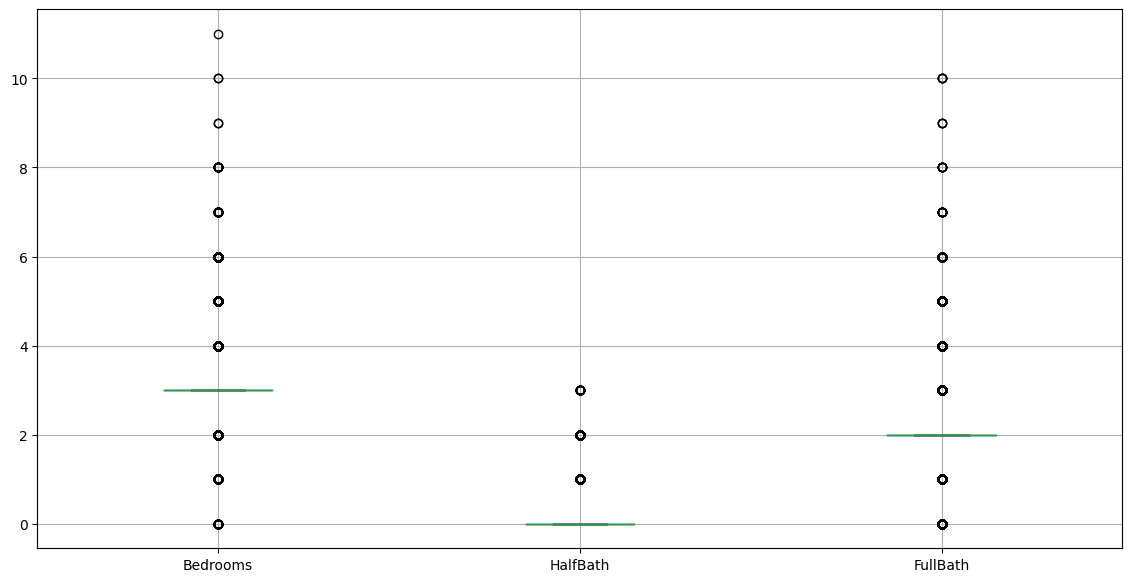

In [127]:
# Vemos el Boxplot para analizar la distribución:
plt.figure(figsize = (14, 7))
df_varios.boxplot()
plt.show()

Datos estandarizados, la normalizacion o standarizacion no afecta a los valores atipicos, osea la distribucion no es afectada

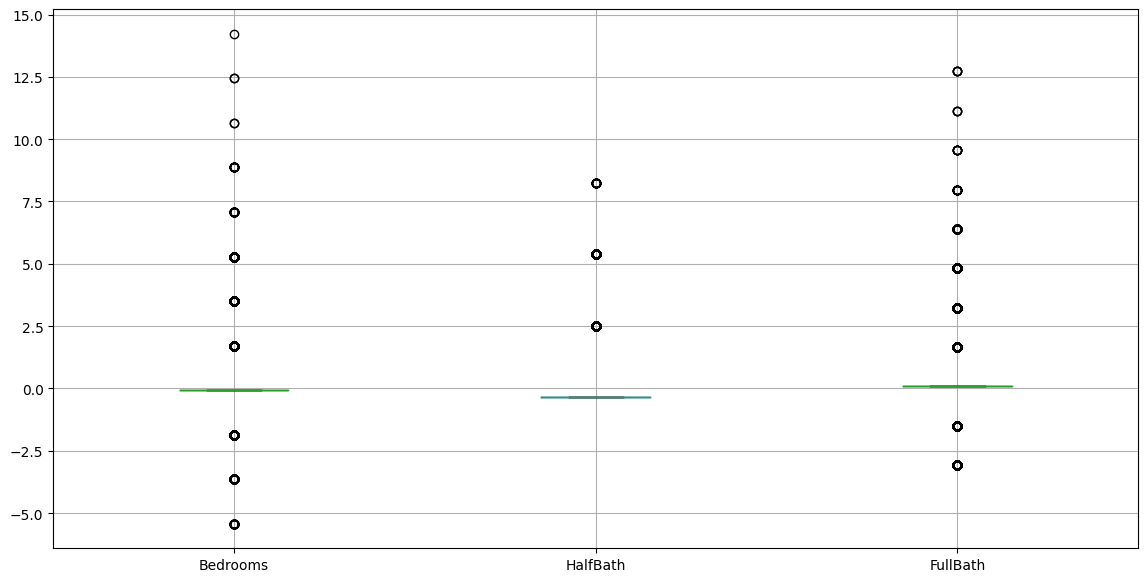

In [129]:
plt.figure(figsize = (14, 7))
datos_z.boxplot()
plt.show()

Vemos los datos de Bedrooms del dataframe df_varios

In [130]:
df_varios['Bedrooms'].describe()

count    56477.000000
mean         3.038458
std          0.559551
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         11.000000
Name: Bedrooms, dtype: float64

 Aplicamos una funcion lambda para definir un rango:

In [133]:
datos_z['Bedrooms_Norm']= datos_z['Bedrooms'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z

,Bedrooms,HalfBath,FullBath,Bedrooms_Norm
0,-0.068730,-0.348237,1.657466,Normal
1,-0.068730,5.389881,1.657466,Normal
2,1.718418,-0.348237,1.657466,Normal
3,-0.068730,-0.348237,1.657466,Normal
4,1.718418,-0.348237,1.657466,Normal
...,...,...,...,...
56472,-0.068730,-0.348237,0.077412,Normal
56473,-0.068730,-0.348237,0.077412,Normal
56474,-0.068730,-0.348237,0.077412,Normal
56475,-0.068730,-0.348237,0.077412,Normal


In [134]:
#Visualizamos los datos normales y atipicos
datos_z['Bedrooms_Norm'].value_counts()

Normal     55157
Atipico     1320
Name: Bedrooms_Norm, dtype: int64

Scatter para visualizar atípicos, marca en rojo los valores atipicos, los datos estan standarizados

In [136]:
import plotly.express as px

fig = px.scatter(datos_z, x="Bedrooms", y="HalfBath", color='Bedrooms_Norm')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#visualizamos la base que creamos anteriormente

In [137]:
df_varios

,Bedrooms,HalfBath,FullBath
0,3.0,0.0,3.0
1,3.0,2.0,3.0
2,4.0,0.0,3.0
3,3.0,0.0,3.0
4,4.0,0.0,3.0
...,...,...,...
56472,3.0,0.0,2.0
56473,3.0,0.0,2.0
56474,3.0,0.0,2.0
56475,3.0,0.0,2.0


Normalizamos los datos para la PCA

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
# Instanciamos el módulo StandarScaler
sc = StandardScaler()

df_varios_fit = sc.fit_transform(df_varios)

Ploteamos la estandarización, el grafico muestra los valores estandarizados por que van de -2 a 2

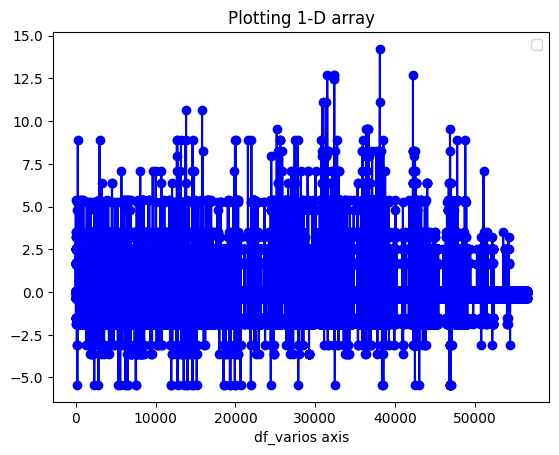

In [142]:
import matplotlib.pyplot as plt

plt.title("Plotting 1-D array")
plt.xlabel("df_varios axis")
# plt.ylabel("Y axis")
plt.plot(df_varios_fit, color = "blue", marker = "o")
plt.legend()
plt.show()

In [143]:
#Aplicación de PCA
from sklearn.decomposition import PCA

In [144]:
# Instanciamos:
pca = PCA()
df_varios_pca = pca.fit_transform(df_varios_fit)

Análisis de la varianza explicada para cada componente: como tengo 3 variable puedo llegar a tener 3 componentes

In [145]:
explained_variance = pca.explained_variance_ratio_  #elijo la mayor cantidad de variabilidad sacrificando la menor variabilidad, por eso elijo las 2 primeras y sacrifico las ultimas dos
explained_variance

array([0.54936734, 0.32344587, 0.12718679])

In [146]:
from sklearn.preprocessing import MinMaxScaler

Ahora para recuperar los datos se tiene que aplicar la transformaciones inversas.

In [147]:
data2 = pca.inverse_transform(df_varios_pca)    #cuando volvemos a transformar pierde ese analisis de hacer un analisis intuitivo
data2

array([[-0.06873098, -0.3482404 ,  1.65748072],
       [-0.06873098,  5.38992823,  1.65748072],
       [ 1.71843281, -0.3482404 ,  1.65748072],
       ...,
       [-0.06873098, -0.3482404 ,  0.07741289],
       [-0.06873098, -0.3482404 ,  0.07741289],
       [-0.06873098, -0.3482404 ,  0.07741289]])

Podemos crear un DataFrame para comprobar las diferencias entre los dos conjuntos de datos.

In [148]:
# Vemos como df:
df2 = pd.DataFrame(data2,columns=df_varios.columns)
df2.head()

,Bedrooms,HalfBath,FullBath
0,-0.068731,-0.348240,1.657481
1,-0.068731,5.389928,1.657481
2,1.718433,-0.348240,1.657481
3,-0.068731,-0.348240,1.657481
4,1.718433,-0.348240,1.657481


Vemos que hay diferencia, entonces medimos cual es el error cuadrático medio entre los dos conjuntos de datos.

In [149]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_varios, df2)

4.602185572025065

Visualizamos los Error Cuadratico medio para Bedrooms y FullBath.

In [150]:
print('El error cuadrático medio para Bedrooms es', mean_squared_error(df_varios['Bedrooms'], df2['Bedrooms']))   # cuanto es la variabilidad de las
print('El error cuadrático medio para FullBath es', mean_squared_error(df_varios['FullBath'], df2['FullBath']))

El error cuadrático medio para Bedrooms es 9.426227728502829
El error cuadrático medio para FullBath es 3.9412007653247865


Graficamos el porcentaje de varianza explicada por cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.54936734 0.32344587 0.12718679]



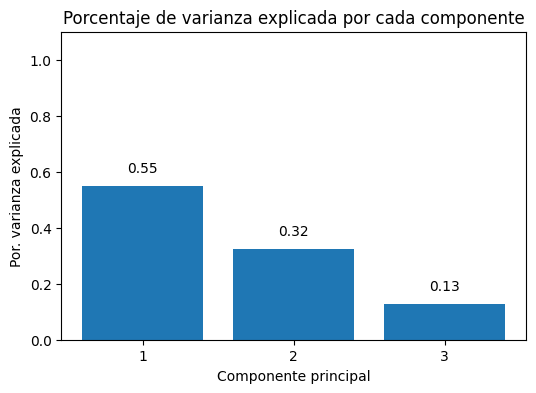

In [151]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
import numpy as np
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_varios.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_varios)

#Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(df_varios)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y, palette='Set1',ax=ax[0]);
sns.scatterplot(x = X_kpca[:, 0], y= X_kpca[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Componente 1", fontsize=12)
ax[0].set_ylabel("Componente 2", fontsize=12)
ax[1].set_xlabel("Componente 1", fontsize=12)
ax[1].set_ylabel("Componente 2", fontsize=12)